In [ ]:
from google.colab import files
uploaded = files.upload()

Saving goodreadsdata.json to goodreadsdata.json


In [ ]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.8 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=4e72d609ba3aa7f1b13721535529f2fc8fd1ad029fad348aa3371cc63e7346cd
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [ ]:
pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.9 MB/s 
     |████████████████████████████████| 213 kB 44.8 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from textblob import TextBlob,Word
from wordcloud import WordCloud, STOPWORDS
from langdetect import detect_langs
from nltk.corpus import stopwords
import tensorflow as tf
import numpy as np 
#import nlp
import nltk
import random
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df = pd.read_json("goodreadsdata.json")
df

,Books
0,{'titles': 'Data Science for Business: What yo...
1,"{'titles': 'Python for Data Analysis', 'author..."
2,"{'titles': 'Python for Data Analysis', 'author..."
3,"{'titles': 'Python for Data Analysis', 'author..."
4,"{'titles': 'Python for Data Analysis', 'author..."
...,...
276,{'titles': 'An Introduction to Statistical Lea...
277,{'titles': 'Data Science for Business: What yo...
278,{'titles': 'Data Science for Business: What yo...
279,{'titles': 'Data Science for Business: What yo...


In [ ]:
#split dictionaries into separate columns in Pandas DataFrame
DF = df["Books"].apply(pd.Series)
DF

,titles,authors,global_rating,reviews
0,Data Science for Business: What you need to kn...,Foster Provost,4.15,[{'reviews': 'Since I wrote it I think it's ex...
1,Python for Data Analysis,Wes McKinney,4.16,[{'reviews': 'Good for familiarizing with pyth...
2,Python for Data Analysis,Wes McKinney,4.16,[{'reviews': 'Better name: 'Data munging with ...
3,Python for Data Analysis,Wes McKinney,4.16,[{'reviews': 'Since Pandas is a rapidly changi...
4,Python for Data Analysis,Wes McKinney,4.16,[{'reviews': 'Very good book for beginner-inte...
...,...,...,...,...
276,An Introduction to Statistical Learning: With ...,Gareth James,4.60,[{'reviews': 'Maybe the best overview and hand...
277,Data Science for Business: What you need to kn...,Foster Provost,4.15,"[{'reviews': 'As a data science novice, I thin..."
278,Data Science for Business: What you need to kn...,Foster Provost,4.15,[{'reviews': 'The book strikes a satisfyingly ...
279,Data Science for Business: What you need to kn...,Foster Provost,4.15,[{'reviews': 'More technical than I was lookin...


In [ ]:
def create_df(reviews,row):
  reviews = reviews.append(row, ignore_index=True)
  return reviews

In [ ]:
reviews = pd.DataFrame(DF.reviews.iloc[0])
reviews

,reviews,ratings
0,Since I wrote it I think it's excellent Since ...,5
1,This is probably the most practical book to re...,5
2,When people say that data science is the way o...,5
3,Provost and Fawcett do a fantastic job of desc...,5
4,I set this book aside a little over a year ago...,1
5,"An an engineer I didn't like this book, it is ...",3
6,"Data Science is quite a buzz word these days, ...",4
7,"The book is very well written, it explains the...",4
8,A thorough introduction to Data Science concep...,0
9,A great book for whom that ask about to implem...,5


In [ ]:
for i in range(1,281):
  reviews= create_df(reviews,DF.reviews.iloc[i])
reviews

,reviews,ratings
0,Since I wrote it I think it's excellent Since ...,5
1,This is probably the most practical book to re...,5
2,When people say that data science is the way o...,5
3,Provost and Fawcett do a fantastic job of desc...,5
4,I set this book aside a little over a year ago...,1
...,...,...
8425,A very useful book for learning Data Mining Mo...,5
8426,"A must read for anyone working with data, no m...",5
8427,Comprehensive introduction to Data Science fro...,5
8428,A must read for any manager that needs to embr...,4


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8430 entries, 0 to 8429
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  8430 non-null   object
 1   ratings  8430 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 131.8+ KB


In [ ]:
reviews.isnull().sum()

reviews    0
ratings    0
dtype: int64

In [ ]:
reviews.duplicated().sum()

516

In [ ]:
reviews=reviews.drop_duplicates(ignore_index=True)

In [ ]:
reviews.duplicated().sum()

0

In [ ]:
reviews

,reviews,ratings
0,Since I wrote it I think it's excellent Since ...,5
1,This is probably the most practical book to re...,5
2,When people say that data science is the way o...,5
3,Provost and Fawcett do a fantastic job of desc...,5
4,I set this book aside a little over a year ago...,1
...,...,...
7909,A very useful book for learning Data Mining Mo...,5
7910,"A must read for anyone working with data, no m...",5
7911,Comprehensive introduction to Data Science fro...,5
7912,A must read for any manager that needs to embr...,4


In [ ]:
from langdetect import detect
reviews['langue'] = reviews['reviews'].apply(detect)
reviews

<ipython-input-17-e5134ffa4fcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['langue'] = reviews['reviews'].apply(detect)


,reviews,ratings,langue
0,Since I wrote it I think it's excellent Since ...,5,en
1,This is probably the most practical book to re...,5,en
2,When people say that data science is the way o...,5,en
3,Provost and Fawcett do a fantastic job of desc...,5,en
4,I set this book aside a little over a year ago...,1,en
...,...,...,...
7909,A very useful book for learning Data Mining Mo...,5,en
7910,"A must read for anyone working with data, no m...",5,en
7911,Comprehensive introduction to Data Science fro...,5,en
7912,A must read for any manager that needs to embr...,4,en


In [ ]:
reviews['langue'].value_counts()

en       7820
it         19
de         10
sv          7
af          7
es          6
tl          5
nl          4
fr          4
ca          4
so          3
fa          3
ro          3
da          3
pl          2
id          2
pt          2
sk          1
cy          1
zh-cn       1
vi          1
sq          1
no          1
cs          1
et          1
ru          1
uk          1
Name: langue, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


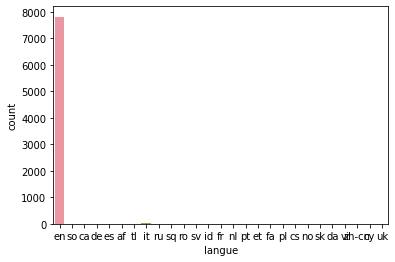

In [ ]:
sns.countplot(reviews['langue'])

In [ ]:
reviews_en = reviews[reviews['langue']=='en'].reset_index(drop=True)
reviews_en

,reviews,ratings,langue
0,Since I wrote it I think it's excellent Since ...,5,en
1,This is probably the most practical book to re...,5,en
2,When people say that data science is the way o...,5,en
3,Provost and Fawcett do a fantastic job of desc...,5,en
4,I set this book aside a little over a year ago...,1,en
...,...,...,...
7815,A very useful book for learning Data Mining Mo...,5,en
7816,"A must read for anyone working with data, no m...",5,en
7817,Comprehensive introduction to Data Science fro...,5,en
7818,A must read for any manager that needs to embr...,4,en


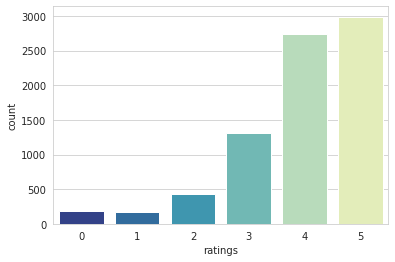

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='ratings',data=reviews_en, palette='YlGnBu_r')

In [ ]:
def wordcloud(col):
  #Creating the text variable
  text = " ".join(cat for cat in col)
  # Generate word cloud
  my_cloud = WordCloud(
          width=3000,
          height=2000,
          random_state=1,
          background_color="salmon",
          colormap="Pastel1",
          collocations=False,
          stopwords=STOPWORDS,
          ).generate(text)
  # Display the generated wordcloud image
  plt.imshow(my_cloud) 
  plt.axis("off")
  plt.show()

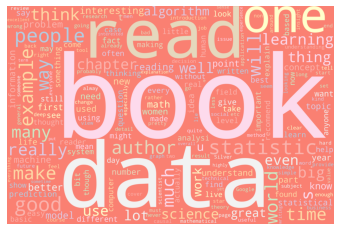

In [ ]:
wordcloud(reviews_en.reviews)

In [ ]:
 pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob

In [ ]:
def sentiment_analysis(df):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity

 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 df['TextBlob_Subjectivity'] = df['reviews'].apply(getSubjectivity)
 df['TextBlob_Polarity'] = df['reviews'].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 df['TextBlob_Analysis'] = df['TextBlob_Polarity'].apply(getAnalysis)
 return df

In [ ]:
sentiment_analysis(reviews_en)

,reviews,ratings,langue,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,Since I wrote it I think it's excellent Since ...,5,en,1.000000,1.000000,Positive
1,This is probably the most practical book to re...,5,en,0.457237,0.145019,Positive
2,When people say that data science is the way o...,5,en,0.551317,0.115183,Positive
3,Provost and Fawcett do a fantastic job of desc...,5,en,0.479329,0.186129,Positive
4,I set this book aside a little over a year ago...,1,en,0.287333,0.118333,Positive
...,...,...,...,...,...,...
7815,A very useful book for learning Data Mining Mo...,5,en,0.191667,0.245000,Positive
7816,"A must read for anyone working with data, no m...",5,en,1.000000,1.000000,Positive
7817,Comprehensive introduction to Data Science fro...,5,en,0.216667,0.166667,Positive
7818,A must read for any manager that needs to embr...,4,en,0.000000,0.000000,Neutral


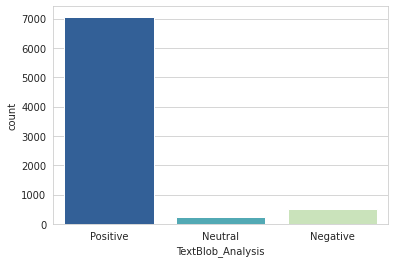

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x=reviews_en.TextBlob_Analysis, palette='YlGnBu_r')

In [ ]:
reviews_en['TextBlob_Analysis'].value_counts()

Positive    7058
Negative     514
Neutral      248
Name: TextBlob_Analysis, dtype: int64

In [ ]:
reviews_en = reviews_en.drop(reviews_en[reviews_en.TextBlob_Analysis == 'Neutral'].index).reset_index(drop=True)

In [ ]:
reviews_en

,reviews,ratings,langue,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,Since I wrote it I think it's excellent Since ...,5,en,1.000000,1.000000,Positive
1,This is probably the most practical book to re...,5,en,0.457237,0.145019,Positive
2,When people say that data science is the way o...,5,en,0.551317,0.115183,Positive
3,Provost and Fawcett do a fantastic job of desc...,5,en,0.479329,0.186129,Positive
4,I set this book aside a little over a year ago...,1,en,0.287333,0.118333,Positive
...,...,...,...,...,...,...
7567,Very good overview of data science. I really e...,5,en,0.626667,0.503333,Positive
7568,A very useful book for learning Data Mining Mo...,5,en,0.191667,0.245000,Positive
7569,"A must read for anyone working with data, no m...",5,en,1.000000,1.000000,Positive
7570,Comprehensive introduction to Data Science fro...,5,en,0.216667,0.166667,Positive


In [ ]:
reviews_en['TextBlob_Analysis'].value_counts()

Positive    7058
Negative     514
Name: TextBlob_Analysis, dtype: int64

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = reviews_en[(reviews_en['TextBlob_Analysis']== 'Positive')] 
df_minority = reviews_en[(reviews_en['TextBlob_Analysis']=='Negative')] 
  
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 7052, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority]).reset_index(drop=True)
df_upsampled

,reviews,ratings,langue,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,Didn't finish; not going to. Gets a bit lost i...,2,en,0.345833,-0.050000,Negative
1,The author is insanely condescending and think...,2,en,0.763333,-0.276667,Negative
2,The book might contain some useful information...,2,en,0.561508,-0.237500,Negative
3,"For me as a PhD student in machine learning, D...",5,en,0.389855,-0.057971,Negative
4,I've been listening to Tim Harford for a bit b...,4,en,0.297778,-0.071111,Negative
...,...,...,...,...,...,...
14105,Very good overview of data science. I really e...,5,en,0.626667,0.503333,Positive
14106,A very useful book for learning Data Mining Mo...,5,en,0.191667,0.245000,Positive
14107,"A must read for anyone working with data, no m...",5,en,1.000000,1.000000,Positive
14108,Comprehensive introduction to Data Science fro...,5,en,0.216667,0.166667,Positive


In [ ]:
df_upsampled['reviews'][0]

"Didn't finish; not going to. Gets a bit lost in unhelpful metaphors to explain various approaches to machine learning, some of which are actually out of vogue but this doesn't become clear from the text. A slow read. Didn't finish; not going to. Gets a bit lost in unhelpful metaphors to explain various approaches to machine learning, some of which are actually out of vogue but this doesn't become clear from the text. A slow read."

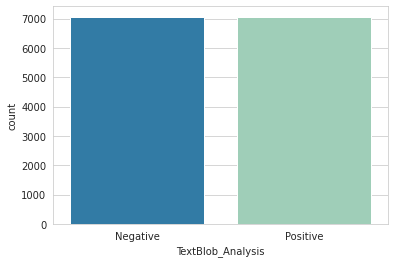

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x=df_upsampled.TextBlob_Analysis, palette='YlGnBu_r')

In [ ]:
from string import punctuation
punctuations = punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def convert_to_lower(text):
    return text.lower()

df_upsampled['reviews'] = df_upsampled['reviews'].apply(lambda x: convert_to_lower(x))

In [ ]:
df_upsampled['reviews'][0]

"didn't finish; not going to. gets a bit lost in unhelpful metaphors to explain various approaches to machine learning, some of which are actually out of vogue but this doesn't become clear from the text. a slow read. didn't finish; not going to. gets a bit lost in unhelpful metaphors to explain various approaches to machine learning, some of which are actually out of vogue but this doesn't become clear from the text. a slow read."

In [ ]:
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

df_upsampled['reviews'] = df_upsampled['reviews'].apply(lambda x: remove_numbers(x))

In [ ]:
df_upsampled['reviews'][0]

"didn't finish; not going to. gets a bit lost in unhelpful metaphors to explain various approaches to machine learning, some of which are actually out of vogue but this doesn't become clear from the text. a slow read. didn't finish; not going to. gets a bit lost in unhelpful metaphors to explain various approaches to machine learning, some of which are actually out of vogue but this doesn't become clear from the text. a slow read."

In [ ]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df_upsampled['reviews'] = df_upsampled['reviews'].apply(lambda x: remove_punctuation(x))

In [ ]:
df_upsampled['reviews'][0]

'didnt finish not going to gets a bit lost in unhelpful metaphors to explain various approaches to machine learning some of which are actually out of vogue but this doesnt become clear from the text a slow read didnt finish not going to gets a bit lost in unhelpful metaphors to explain various approaches to machine learning some of which are actually out of vogue but this doesnt become clear from the text a slow read'

In [ ]:
def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)
    
df_upsampled['reviews'] = df_upsampled['reviews'].apply(lambda x: remove_punctuation(x))

In [ ]:
df_upsampled['reviews'][0]

'didnt finish not going to gets a bit lost in unhelpful metaphors to explain various approaches to machine learning some of which are actually out of vogue but this doesnt become clear from the text a slow read didnt finish not going to gets a bit lost in unhelpful metaphors to explain various approaches to machine learning some of which are actually out of vogue but this doesnt become clear from the text a slow read'

In [ ]:
def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

df_upsampled['reviews'] = df_upsampled['reviews'].apply(lambda x: remove_extra_white_spaces(x))

In [ ]:
df_upsampled['reviews'][0]

'didnt finish not going to gets bit lost in unhelpful metaphors to explain various approaches to machine learning some of which are actually out of vogue but this doesnt become clear from the text slow read didnt finish not going to gets bit lost in unhelpful metaphors to explain various approaches to machine learning some of which are actually out of vogue but this doesnt become clear from the text slow read'

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
def lemmatizing(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

df_upsampled['reviews'] = df_upsampled['reviews'].apply(lambda x: lemmatizing(x))

In [ ]:
df_upsampled['reviews'][0]

'didnt finish not going to get bit lost in unhelpful metaphor to explain various approach to machine learning some of which are actually out of vogue but this doesnt become clear from the text slow read didnt finish not going to get bit lost in unhelpful metaphor to explain various approach to machine learning some of which are actually out of vogue but this doesnt become clear from the text slow read'

In [ ]:
df_upsampled

,reviews,ratings,langue,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,didnt finish not going to get bit lost in unhe...,2,en,0.345833,-0.050000,Negative
1,the author is insanely condescending and think...,2,en,0.763333,-0.276667,Negative
2,the book might contain some useful information...,2,en,0.561508,-0.237500,Negative
3,for me a phd student in machine learning domin...,5,en,0.389855,-0.057971,Negative
4,ive been listening to tim harford for bit both...,4,en,0.297778,-0.071111,Negative
...,...,...,...,...,...,...
14105,very good overview of data science really enjo...,5,en,0.626667,0.503333,Positive
14106,a very useful book for learning data mining mo...,5,en,0.191667,0.245000,Positive
14107,a must read for anyone working with data no ma...,5,en,1.000000,1.000000,Positive
14108,comprehensive introduction to data science fro...,5,en,0.216667,0.166667,Positive


In [ ]:
from collections import Counter
all_text = ' '.join(df_upsampled.reviews)
# create a list of words
words = all_text.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [ ]:
total_words

2509492

In [ ]:
sorted_words

[('the', 127060),
 ('and', 74314),
 ('to', 73426),
 ('of', 72743),
 ('is', 43241),
 ('it', 42742),
 ('in', 41280),
 ('book', 37124),
 ('that', 35335),
 ('this', 33306),
 ('for', 24015),
 ('are', 21173),
 ('data', 19758),
 ('but', 18209),
 ('on', 18017),
 ('a', 17796),
 ('not', 17526),
 ('you', 17428),
 ('with', 17357),
 ('be', 16454),
 ('how', 13366),
 ('about', 13077),
 ('wa', 12822),
 ('have', 12391),
 ('or', 11033),
 ('’', 10959),
 ('can', 10457),
 ('an', 10381),
 ('read', 9965),
 ('we', 9623),
 ('what', 9564),
 ('from', 9409),
 ('at', 9354),
 ('more', 9242),
 ('one', 8729),
 ('by', 8722),
 ('some', 8661),
 ('if', 8546),
 ('all', 8410),
 ('statistic', 8164),
 ('they', 8139),
 ('so', 7995),
 ('like', 7846),
 ('he', 7278),
 ('there', 7056),
 ('people', 6938),
 ('my', 6848),
 ('author', 6509),
 ('which', 6461),
 ('very', 6331),
 ('me', 6271),
 ('make', 6194),
 ('when', 6143),
 ('example', 6073),
 ('just', 5898),
 ('way', 5841),
 ('who', 5834),
 ('will', 5699),
 ('good', 5655),
 ('algor

In [ ]:
# convert reviews_seentiment to numeric
sentiment_label = df_upsampled.TextBlob_Analysis.factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 1, 1]),
 Index(['Negative', 'Positive'], dtype='object'))

In [ ]:
review = df_upsampled.reviews.values
review

array(['didnt finish not going to get bit lost in unhelpful metaphor to explain various approach to machine learning some of which are actually out of vogue but this doesnt become clear from the text slow read didnt finish not going to get bit lost in unhelpful metaphor to explain various approach to machine learning some of which are actually out of vogue but this doesnt become clear from the text slow read',
       'the author is insanely condescending and think calling people fat is funny however must concede think he doe decent job explaining hypothesis testing and the central limit theorem idk probably look elsewhere the tone wa extremely annoying throughout',
       'the book might contain some useful information but it is extremely boring i ’ m not sure why but it simply is',
       ...,
       'a must read for anyone working with data no matter the role or interest provides holistic view of how to apply data science to your business problem happy read',
       'comprehensive in

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(review, sentiment_label[0], test_size=0.3, stratify=sentiment_label[0])
print("Training Data Input Shape: ", X_train.shape)
print("Training Data Output Shape: ", y_train.shape)
print("Testing Data Input Shape: ", X_test.shape)
print("Testing Data Output Shape: ", y_test.shape)

Training Data Input Shape:  (9877,)
Training Data Output Shape:  (9877,)
Testing Data Input Shape:  (4233,)
Testing Data Output Shape:  (4233,)


In [ ]:
vocab_size =10000
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [ ]:
tokenizer.fit_on_texts(X_train)
print("Number of Documents: ", tokenizer.document_count)
print("Number of Words: ", tokenizer.num_words)

Number of Documents:  9877
Number of Words:  10000


In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
tokenizer.word_counts

OrderedDict([('this', 23489),
             ('wa', 9067),
             ('an', 7394),
             ('extremely', 458),
             ('interesting', 2262),
             ('and', 52527),
             ('informative', 388),
             ('read', 7001),
             ('learnt', 114),
             ('so', 5574),
             ('much', 3444),
             ('from', 6589),
             ('reading', 2883),
             ('book', 26066),
             ('which', 4605),
             ('hope', 402),
             ('can', 7429),
             ('retain', 23),
             ('but', 12726),
             ('yes', 243),
             ('is', 30375),
             ('very', 4456),
             ('statistic', 5684),
             ('heavy', 183),
             ('a', 12631),
             ('result', 846),
             ('there', 4993),
             ('lot', 2853),
             ('to', 52140),
             ('take', 1509),
             ('in', 29238),
             ('the', 89796),
             ('best', 1087),
             ('about', 9195)

In [ ]:
tokenizer.word_docs

defaultdict(int,
            {'in': 6252,
             'can': 2963,
             'but': 4958,
             'read': 3381,
             'from': 2798,
             'much': 1802,
             'informative': 269,
             'retain': 22,
             'result': 476,
             'take': 950,
             'reading': 1679,
             'heavy': 122,
             'which': 2069,
             'very': 2277,
             'book': 7133,
             'and': 7936,
             'interesting': 1270,
             'a': 4177,
             'this': 6447,
             'an': 3174,
             'yes': 171,
             'wa': 3147,
             'statistic': 1985,
             'so': 2526,
             'hope': 267,
             'there': 2252,
             'lot': 1562,
             'to': 7816,
             'extremely': 300,
             'is': 6183,
             'learnt': 89,
             'related': 185,
             'breadth': 37,
             'unopinionated': 1,
             'for': 5256,
             'technical':

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences[0])

[11, 24, 29, 494, 119, 3, 566, 30, 1554, 44, 73, 33, 89, 11, 9, 49, 549, 28, 4599, 16, 853, 11, 9, 6, 51, 42, 1090, 17, 290, 46, 6, 92, 4, 162, 8]


In [ ]:
sequence_length = 200
train_padded = pad_sequences(train_sequences, maxlen=sequence_length, padding='post', truncating='post')

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=sequence_length, padding='post', truncating='post')

In [ ]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           320000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 336,651
Trainable params: 336,651
Non-trainable params: 0
__________________________________________________

In [ ]:
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint_filepath = os.getcwd()
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)
callbacks = [EarlyStopping(patience=3), model_checkpoint_callback]

In [77]:
history = model.fit(train_padded, y_train, epochs=10, validation_data=(test_padded, y_test) ,callbacks=callbacks)

Epoch 1/10
309/309 [==============================] - 85s 273ms/step - loss: 0.2798 - accuracy: 0.9202 - val_loss: 0.2964 - val_accuracy: 0.9076
Epoch 2/10
309/309 [==============================] - 81s 262ms/step - loss: 0.2449 - accuracy: 0.9323 - val_loss: 0.2661 - val_accuracy: 0.9220
Epoch 3/10
309/309 [==============================] - 83s 268ms/step - loss: 0.2306 - accuracy: 0.9369 - val_loss: 0.2361 - val_accuracy: 0.9334
Epoch 4/10
309/309 [==============================] - 81s 261ms/step - loss: 0.2383 - accuracy: 0.9331 - val_loss: 0.2482 - val_accuracy: 0.9289
Epoch 5/10
309/309 [==============================] - 83s 268ms/step - loss: 0.2057 - accuracy: 0.9440 - val_loss: 0.2300 - val_accuracy: 0.9253
Epoch 6/10
309/309 [==============================] - 87s 282ms/step - loss: 0.2000 - accuracy: 0.9435 - val_loss: 0.1781 - val_accuracy: 0.9523
Epoch 7/10
309/309 [==============================] - 94s 304ms/step - loss: 0.1858 - accuracy: 0.9504 - val_loss: 0.1907 - val_ac

In [78]:
metrics_df = pd.DataFrame(history.history)
print(metrics_df)

       loss  accuracy  val_loss  val_accuracy
0  0.279817  0.920219  0.296421      0.907631
1  0.244939  0.932267  0.266079      0.922041
2  0.230585  0.936924  0.236139      0.933381
3  0.238290  0.933077  0.248239      0.928892
4  0.205710  0.944011  0.230015      0.925348
5  0.200024  0.943505  0.178134      0.952280
6  0.185773  0.950390  0.190687      0.947555
7  0.194645  0.949884  0.199060      0.945665
8  0.211526  0.936722  0.285908      0.887550


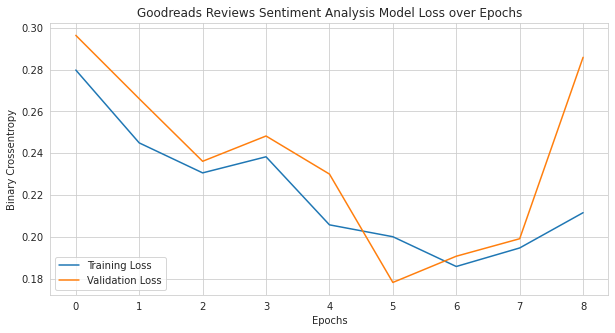

In [79]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.loss)
plt.plot(metrics_df.index, metrics_df.val_loss)
plt.title('Goodreads Reviews Sentiment Analysis Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

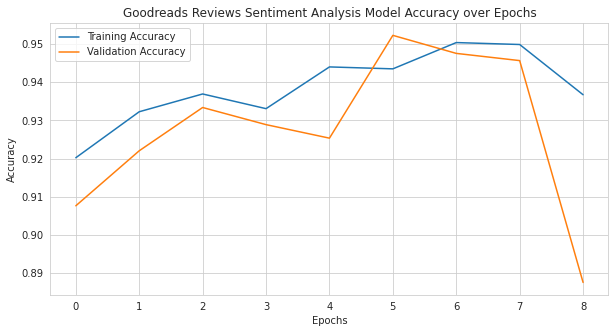

In [80]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.accuracy)
plt.plot(metrics_df.index, metrics_df.val_accuracy)
plt.title('Goodreads Reviews Sentiment Analysis Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [74]:
text ="I keep seeing all these posts about how  2021 was terrible for lots of people... and it's sad, because it was a very good year for me."
sentiment = TextBlob(text).sentiment
sentiment

Sentiment(polarity=-0.19666666666666668, subjectivity=0.9266666666666667)

In [81]:
test_word ="I keep seeing all these posts about how  the book was terrible for lots of people... and it's sad, because it was a very good one for me."
seq = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(seq,maxlen=200)
prediction = int(model.predict(tw).round().item())
sentiment_label[1][prediction]

1/1 [==============================] - 0s 38ms/step


'Positive'

In [82]:
test_word ="the book is awful"
seq = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(seq,maxlen=200)
prediction = int(model.predict(tw).round().item())
sentiment_label[1][prediction]

1/1 [==============================] - 0s 36ms/step


'Negative'